<a href="https://colab.research.google.com/github/Zypher44/100DaysOfCode/blob/main/CovidCasesStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#Reading in covid cases from India 
df = pd.read_json('https://www.mohfw.gov.in/data/datanew.json')

In [3]:
df

,sno,state_name,active,positive,cured,death,new_active,new_positive,new_cured,new_death,state_code
0,2,Andaman and Nicobar Islands,13,7592,7450,129,15,7595,7451,129,35
1,1,Andhra Pradesh,14603,2033419,2004786,14030,14708,2034786,2006034,14044,28
2,3,Arunachal Pradesh,545,53943,53127,271,536,53990,53183,271,12
3,4,Assam,5396,596606,585435,5775,5381,597074,585914,5779,18
4,5,Bihar,66,725852,716128,9658,72,725864,716134,9658,10
5,6,Chandigarh,29,65164,64317,818,31,65168,64319,818,04
6,7,Chhattisgarh,350,1004957,991048,13559,352,1004988,991077,13559,22
7,8,Dadra and Nagar Haveli and Daman and Diu,5,10670,10661,4,5,10670,10661,4,26
8,10,Delhi,404,1438345,1412858,25083,409,1438373,1412880,25084,07
9,11,Goa,700,175088,171099,3289,699,175183,171195,3289,30


In [5]:
#Understanding the data 
df.shape

(37, 11)

In [7]:
df.isnull().sum()

sno             0
state_name      0
active          0
positive        0
cured           0
death           0
new_active      0
new_positive    0
new_cured       0
new_death       0
state_code      0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sno           37 non-null     int64 
 1   state_name    37 non-null     object
 2   active        37 non-null     int64 
 3   positive      37 non-null     int64 
 4   cured         37 non-null     int64 
 5   death         37 non-null     int64 
 6   new_active    37 non-null     int64 
 7   new_positive  37 non-null     int64 
 8   new_cured     37 non-null     int64 
 9   new_death     37 non-null     int64 
 10  state_code    37 non-null     object
dtypes: int64(9), object(2)
memory usage: 3.3+ KB


In [9]:
df.describe()

,sno,active,positive,cured,death,new_active,new_positive,new_cured,new_death
count,37.000000,37.000000,3.700000e+01,3.700000e+01,37.000000,37.000000,3.700000e+01,3.700000e+01,37.000000
mean,319.054054,18536.378378,1.802558e+06,1.760026e+06,23996.108108,18327.351351,1.804418e+06,1.762077e+06,24013.405405
std,1823.499245,63542.808153,5.497671e+06,5.365504e+06,74712.355219,62655.556309,5.503522e+06,5.371956e+06,74764.071349
min,1.000000,4.000000,7.592000e+03,7.450000e+03,4.000000,4.000000,7.595000e+03,7.451000e+03,4.000000
25%,11.000000,149.000000,7.872900e+04,7.569800e+04,818.000000,149.000000,7.895800e+04,7.578400e+04,818.000000
50%,20.000000,545.000000,5.966060e+05,5.843610e+05,5775.000000,536.000000,5.970740e+05,5.843990e+05,5779.000000
75%,29.000000,5396.000000,1.017718e+06,1.004164e+06,14030.000000,5335.000000,1.018298e+06,1.004845e+06,14044.000000
max,11111.000000,342923.000000,3.334732e+07,3.256047e+07,443928.000000,339056.000000,3.338173e+07,3.259842e+07,444248.000000


In [12]:
df.keys() #These are our columns 
df.columns

Index(['sno', 'state_name', 'active', 'positive', 'cured', 'death',
       'new_active', 'new_positive', 'new_cured', 'new_death', 'state_code'],
      dtype='object')

In [13]:
df.columns

Index(['sno', 'state_name', 'active', 'positive', 'cured', 'death',
       'new_active', 'new_positive', 'new_cured', 'new_death', 'state_code'],
      dtype='object')

In [14]:
#Lets get rid of the total row that is at the end 
df = df.iloc[:36]
df

,sno,state_name,active,positive,cured,death,new_active,new_positive,new_cured,new_death,state_code
0,2,Andaman and Nicobar Islands,13,7592,7450,129,15,7595,7451,129,35
1,1,Andhra Pradesh,14603,2033419,2004786,14030,14708,2034786,2006034,14044,28
2,3,Arunachal Pradesh,545,53943,53127,271,536,53990,53183,271,12
3,4,Assam,5396,596606,585435,5775,5381,597074,585914,5779,18
4,5,Bihar,66,725852,716128,9658,72,725864,716134,9658,10
5,6,Chandigarh,29,65164,64317,818,31,65168,64319,818,04
6,7,Chhattisgarh,350,1004957,991048,13559,352,1004988,991077,13559,22
7,8,Dadra and Nagar Haveli and Daman and Diu,5,10670,10661,4,5,10670,10661,4,26
8,10,Delhi,404,1438345,1412858,25083,409,1438373,1412880,25084,07
9,11,Goa,700,175088,171099,3289,699,175183,171195,3289,30


In [15]:
#Finding total active cases after removing bottom row
df['active'].sum(axis=0)

342923

In [16]:
df['positive'].sum(axis=0)

33347325

In [17]:
df['death'].sum(axis=0)

443928

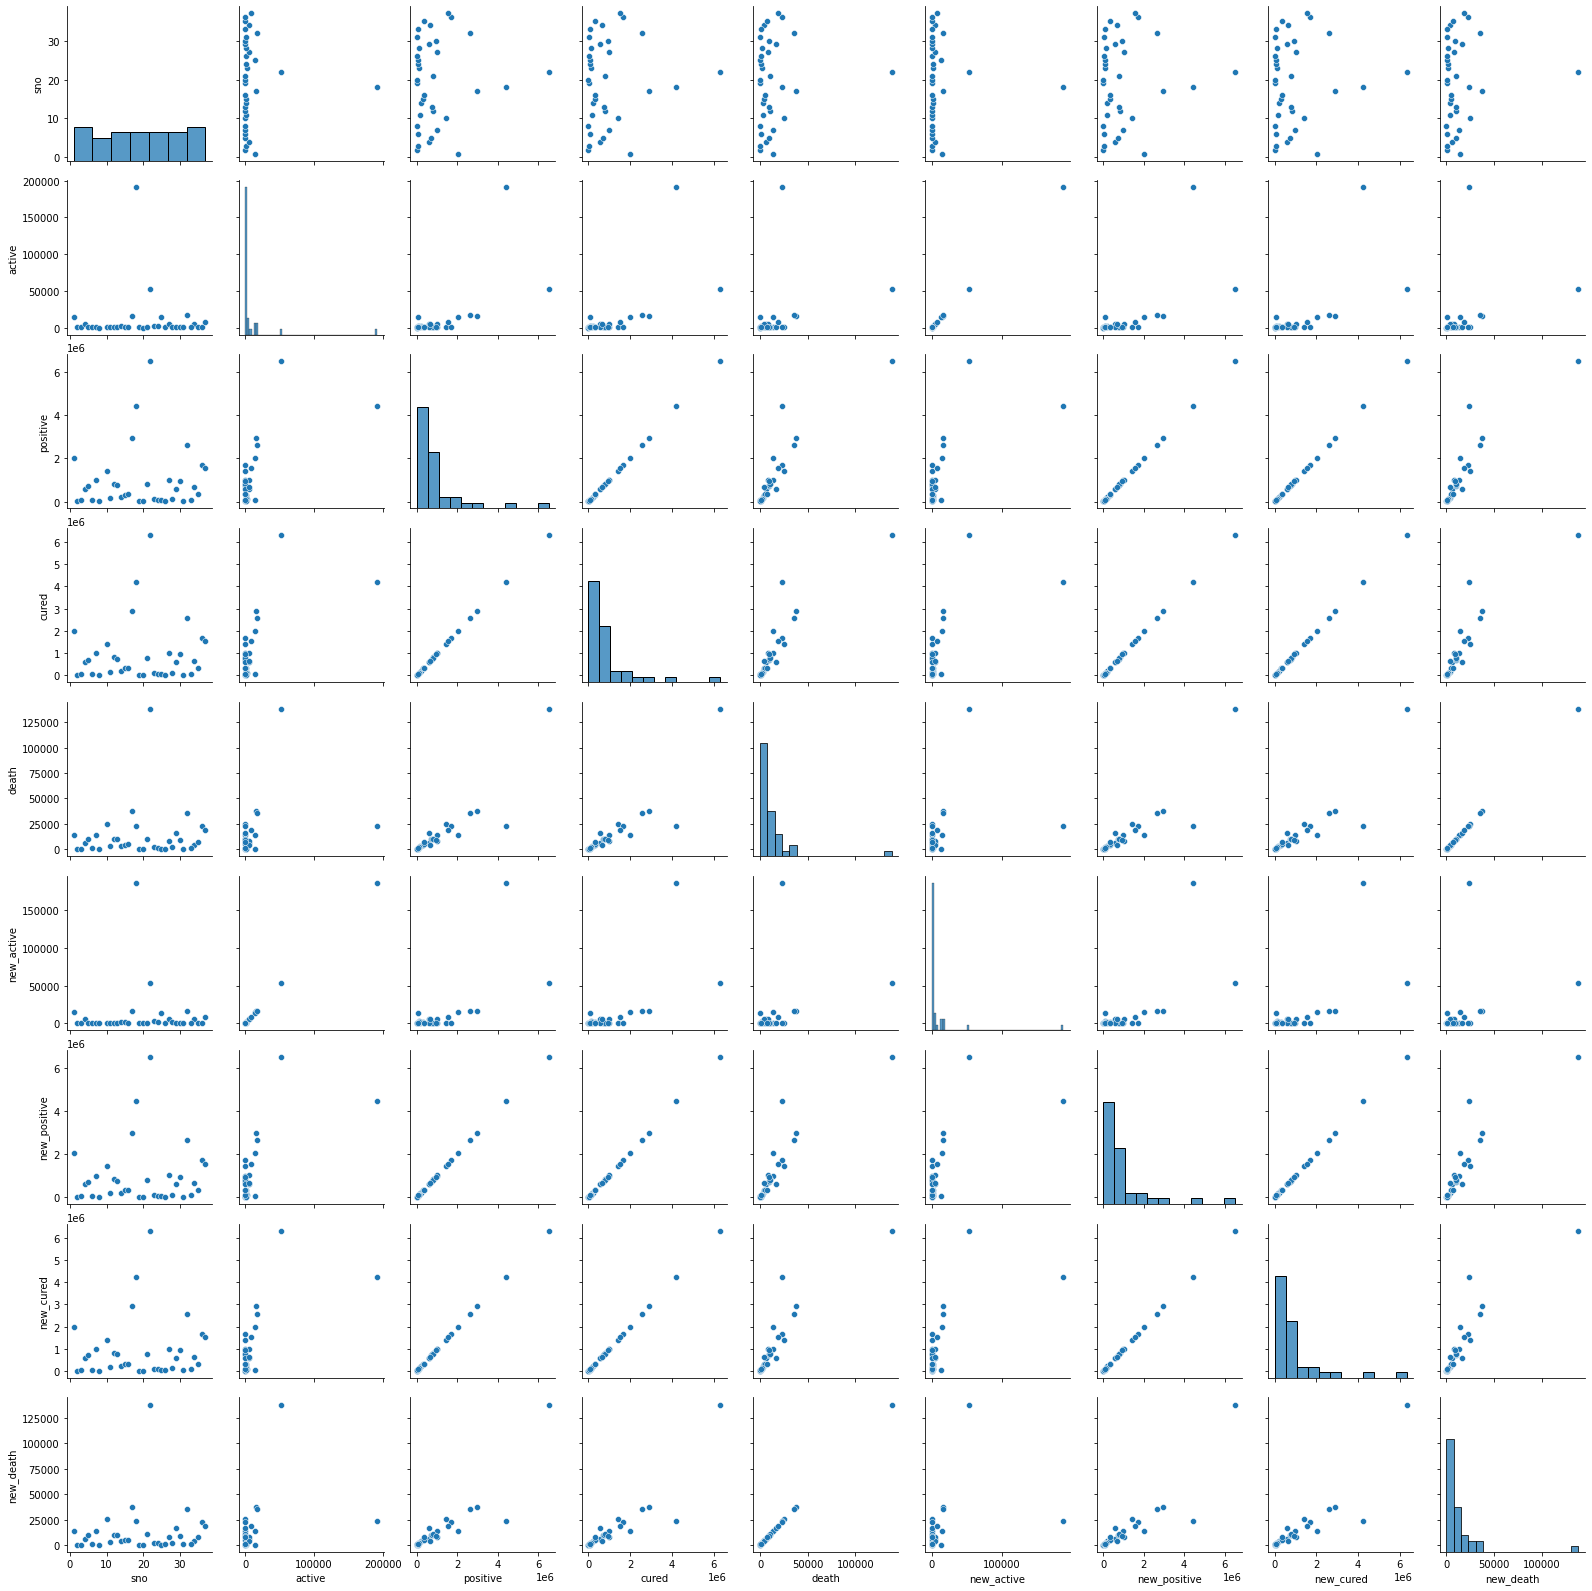

In [18]:
#Time to visualize our data 
sns.pairplot(data=df)

In [19]:
cases_df = df.sum()

In [20]:
cases_df

sno                                                           694
state_name      Andaman and Nicobar IslandsAndhra PradeshAruna...
active                                                     342923
positive                                                 33347325
cured                                                    32560474
death                                                      443928
new_active                                                 339056
new_positive                                             33381728
new_cured                                                32598424
new_death                                                  444248
state_code      3528121810042226073024060201202932373123271417...
dtype: object

In [22]:
#Dropping unnesscary columns non numeric in nature
cases_df.drop(['sno','state_name','state_code'],inplace=True)


In [23]:
cases_df

active            342923
positive        33347325
cured           32560474
death             443928
new_active        339056
new_positive    33381728
new_cured       32598424
new_death         444248
dtype: object

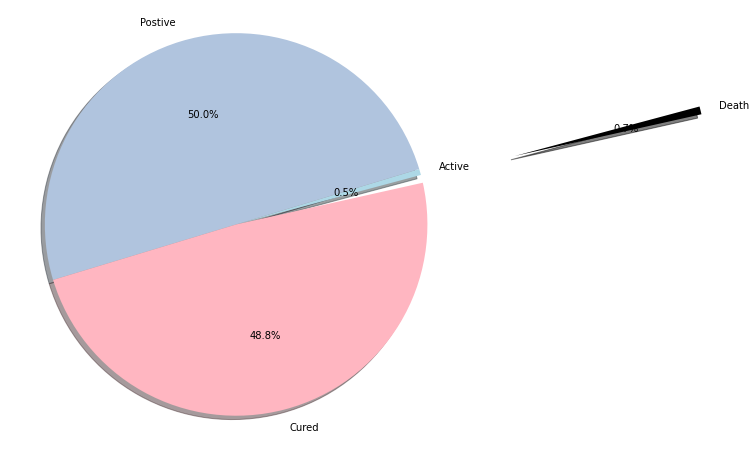

In [26]:
data = [342923,33347325,32560474,443928]
labels = 'Active','Postive','Cured','Death'
my_explode = (0,0,0,1.5)#Shift the death to give a better percption
my_colorss = ['lightblue','lightsteelblue','lightpink','black']
fig1, acx1 = plt.subplots(figsize=(13,8))
plt.pie(data,labels=labels,autopct='%1.1f%%',startangle=15,shadow=True, colors=my_colorss, explode=my_explode)
plt.axis('equal')
plt.show()

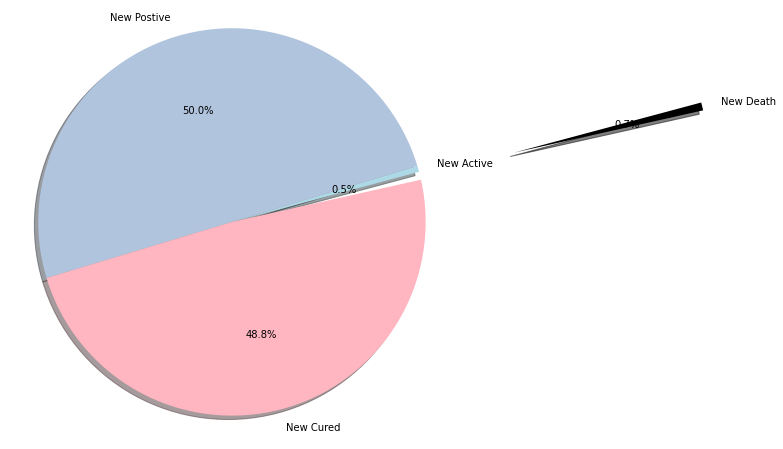

In [28]:
data = [339056,33381728,32598424,444248]
labels = 'New Active','New Postive','New Cured','New Death'
my_explode = (0,0,0,1.5)#Shift the death to give a better percption
my_colorss = ['lightblue','lightsteelblue','lightpink','black']
fig1, acx1 = plt.subplots(figsize=(13,8))
plt.pie(data,labels=labels,autopct='%1.1f%%',startangle=15,shadow=True, colors=my_colorss, explode=my_explode)
plt.axis('equal')
plt.show()

In [29]:
#Giving figure size
plt.rcParams['figure.figsize'] = (13,8)


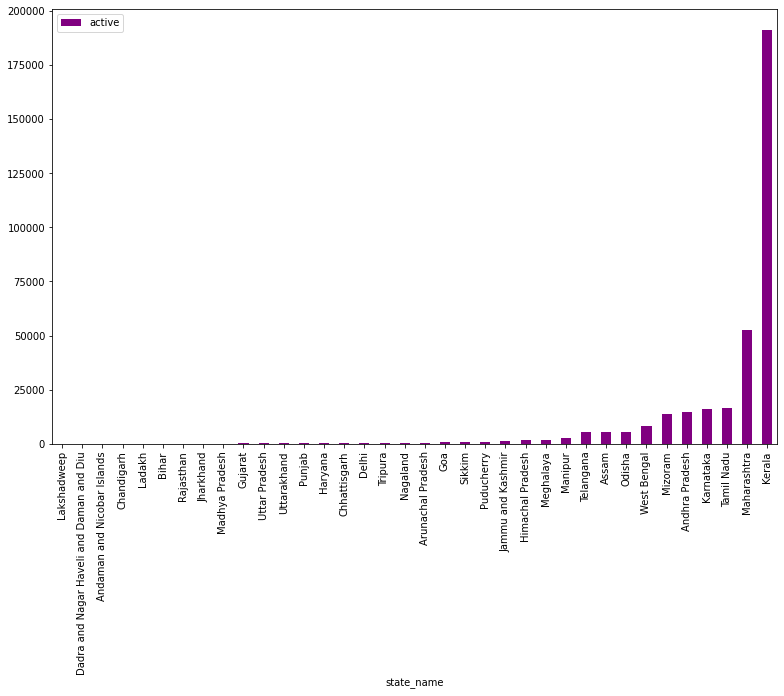

In [31]:
df[['state_name','active']].groupby(['state_name']).mean().sort_values(by='active').plot.bar(color='purple')
#Use the groupby function to sort values in an ascednning order based on x-axis,y-axis and its keys 
#Below we get a clear picture of the states in an increasing order based on active cases 


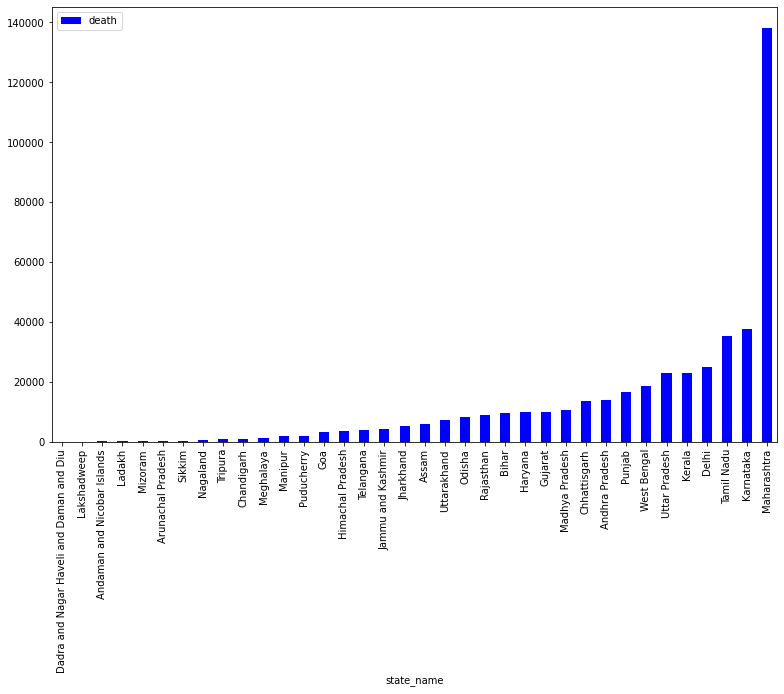

In [32]:
#Lets see what state has had the most deaths 
df[['state_name','death']].groupby(['state_name']).mean().sort_values(by='death').plot.bar(color='blue')

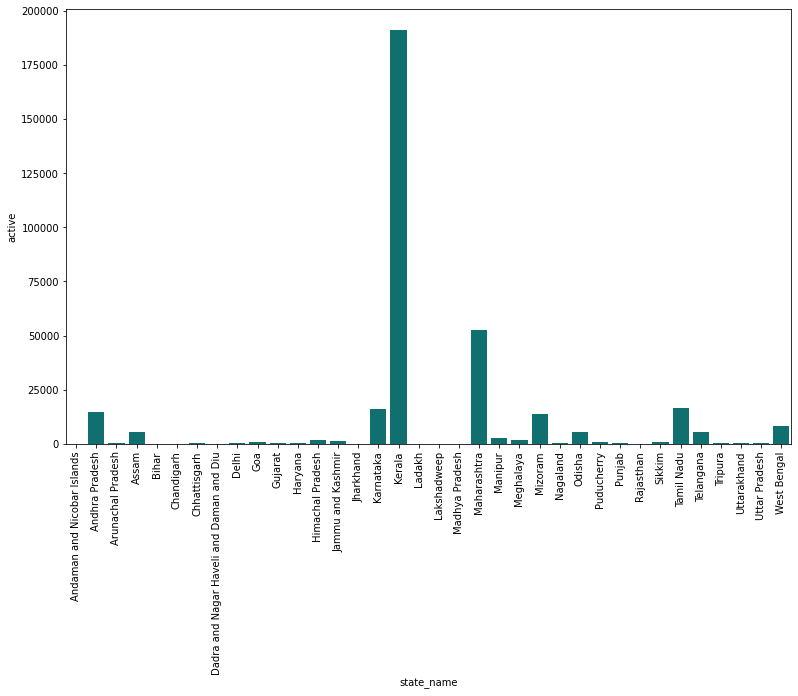

In [33]:
plt.figure(figsize=(13,8))
plt.xticks(rotation=90)
sns.barplot(x='state_name',y='active',color='teal',data=df)

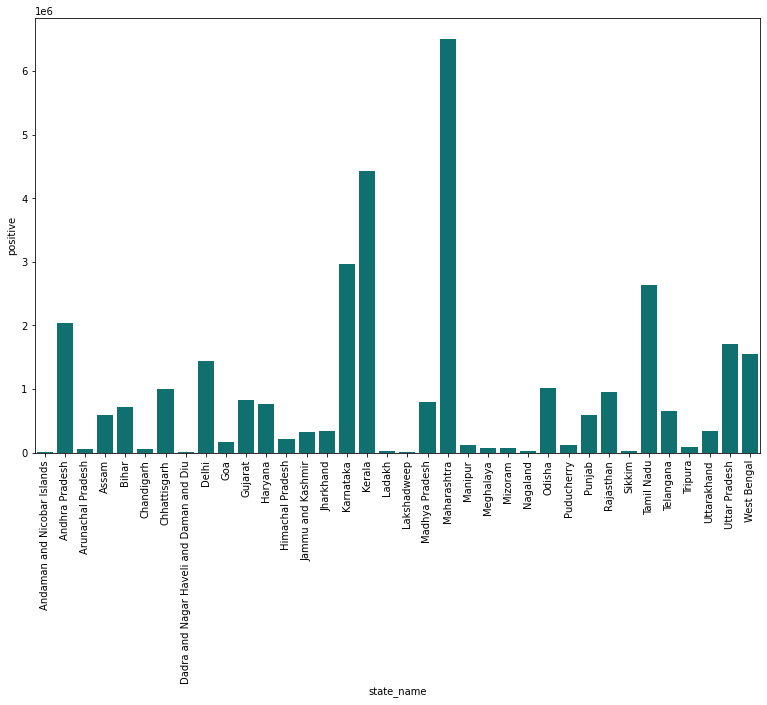

In [34]:
plt.figure(figsize=(13,8))
plt.xticks(rotation=90)#Rotates labels to allow us to see them better
sns.barplot(x='state_name',y='positive',color='teal',data=df)

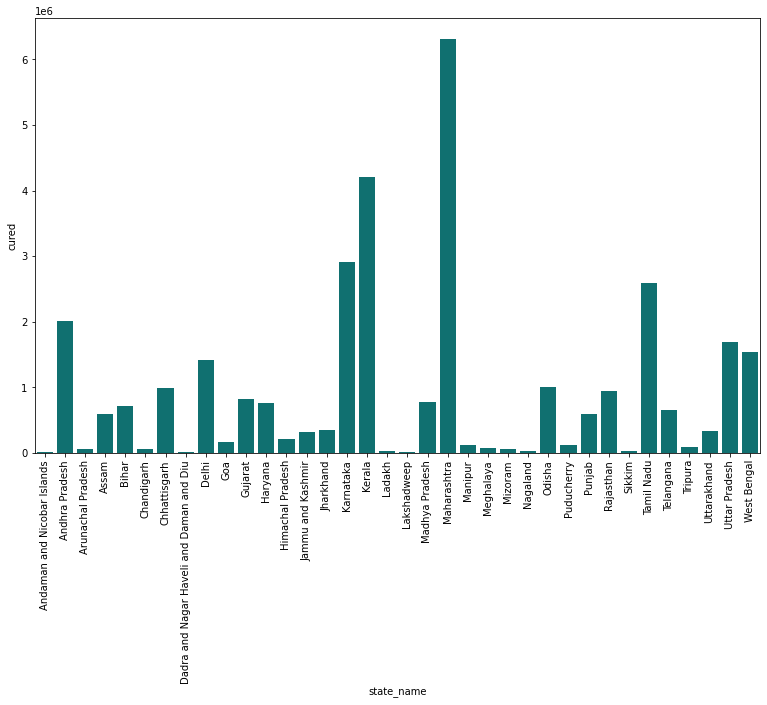

In [35]:
plt.figure(figsize=(13,8))
plt.xticks(rotation=90)
sns.barplot(x='state_name',y='cured',color='teal',data=df)

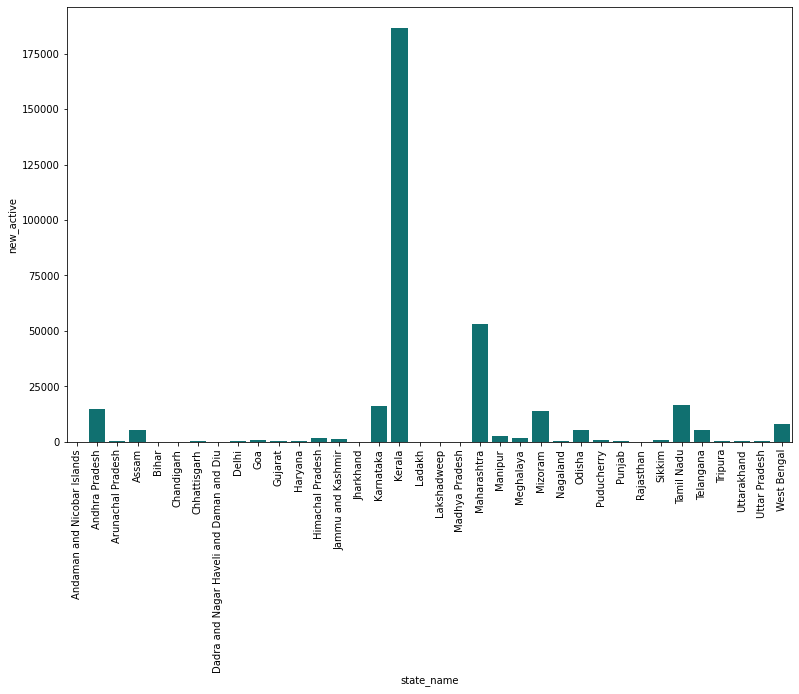

In [36]:
plt.figure(figsize=(13,8))
plt.xticks(rotation=90)
sns.barplot(x='state_name',y='new_active',color='teal',data=df)